# TỔNG QUAN VỀ BỘ DỮ LIỆU
1. person_age: Age of the person.
2. person_gender: Gender of the person.
3. person_education: Highest education level.
4. person_income: Annual income.
5. person_emp_exp: Years of employment experience.
6. person_home_ownership: Home ownership status (e.g., rent, own, mortgage).
7. loan_amnt: Loan amount requested.
8. loan_intent: Purpose of the loan.
9. loan_int_rate: Loan interest rate.
10. loan_percent_income: Loan amount as a percentage of annual income.
11. cb_person_cred_hist_length: Length of credit history in years.
12. credit_score: Credit score of the person.
13. previous_loan_defaults_on_file: Indicator of previous loan defaults.
14. loan_status (target variable): Loan approval status: 1 = approved; 0 = rejected.

# IMPORT CÁC THƯ VIỆN CẦN THIẾT

In [96]:
import time
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

<p> Đưa dữ liệu vào 

In [97]:
# đọc file csv 
df = pd.read_csv(r'D:\HK2-Y4\Học máy\LOAN Status\loan_data.csv')
# in ra 5 hàng đầu 
df.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [98]:
# in ra 5 hàng cuối
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


# TÌM HIỂU VỀ DỮ LIỆU - EXPLORE DATA ANALYSIS(EDA)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [100]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [101]:
df.duplicated().sum()

0

In [102]:
df.isin([np.inf, -np.inf]).any()

person_age                        False
person_gender                     False
person_education                  False
person_income                     False
person_emp_exp                    False
person_home_ownership             False
loan_amnt                         False
loan_intent                       False
loan_int_rate                     False
loan_percent_income               False
cb_person_cred_hist_length        False
credit_score                      False
previous_loan_defaults_on_file    False
loan_status                       False
dtype: bool

**Note**:
1. Bộ dữ liệu có 14 cột và 45k dòng.
2. Bộ dữ liệu khá là sạch vì không chứa giá trị rỗng  ```null``` và giá trị trùng lặp ```duplicate```.
3. Bộ dữ liệu không chứa dạng ```infinity```.
4. Hầu hết các giá trị đều có dạng ```int``` và ```float``` trừ 5 cột :<br>
    -Cột: ```person_gender```,```person_education```,```person_home_ownership```,```loan_intent```,```previous_loan_defaults_on_file```.
    > => Cần modify kiểu dữ liệu lại các cột này để có thể huấn luyện mô hình 


In [103]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


**Note**:
1) Cột ```person_age``` có giá trị max là 144 điều này không hợp lý.
2) Cột ```person_income``` có giá trị cao nhất là 7m2 trong khi giá trị thấp nhất là 8k điều này cho thấy sự chênh lệch về mức lương.
3) Cột ```person_emp_exp``` có giá trị cao nhất là 125 có thể đây là giá trị ngoại lai vì không một ai có thể sống trên 125 tuổi để có kinh nghiệm là việc là 125.
4) Cột ```loan_amnt``` có giá trị dao động từ 500 đến 35k.
5) Cột ```loan_int_rate``` có giá trị lãi suất là 5.42% đến 20%
6) Cột ```loan_percent_income``` có giá trị là 0.66% điều này cho thấy một số người vay có nguy cơ tài chính cao.
7) Cột ```cb_person_cred_hist_length``` thời gian lịch sử trung bình là 5.87`. Tuy nhiên ta thấy có một người có lịch sử tín dụng đến 30 năm.
8) Cột ```credit_score``` có giá trị dao động từ 390 đến 850
9) Cột ```loan_status``` là biến mục tiêu nên sẽ giải thích khi khai phá thông tin các cột.


### Xử lý các trường hợp dữ liệu sai thông tin

In [104]:
# Với cột tuổi
df = df[(df['person_age'] >= 18) & (df['person_age'] <= 100)]
# Với cột kinh nghiệm việc làm 
df = df[(df['person_emp_exp'] >= 0) & (df['person_emp_exp'] <= 50)]
#in lại các thông tin thống kê của cột
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44988.000000,4.498800e+04,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000
mean,27.742354,7.990907e+04,5.388148,9583.323820,11.006634,0.139738,5.864408,632.573308,0.222281
std,5.881527,6.332489e+04,5.896067,6314.994983,2.979042,0.087209,3.872007,50.389790,0.415784
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.719425e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704550e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.577900e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,73.000000,2.448661e+06,50.000000,35000.000000,20.000000,0.660000,30.000000,784.000000,1.000000


In [105]:
df.shape

(44988, 14)

### Khai phá thông tin về các cột


In [106]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']
Categorical Columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


In [107]:
df.shape

(44988, 14)

In [108]:
df['person_education'].value_counts()

person_education
Bachelor       13395
Associate      12025
High School    11967
Master          6980
Doctorate        621
Name: count, dtype: int64

In [109]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            9151
MEDICAL              8544
VENTURE              7815
PERSONAL             7550
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

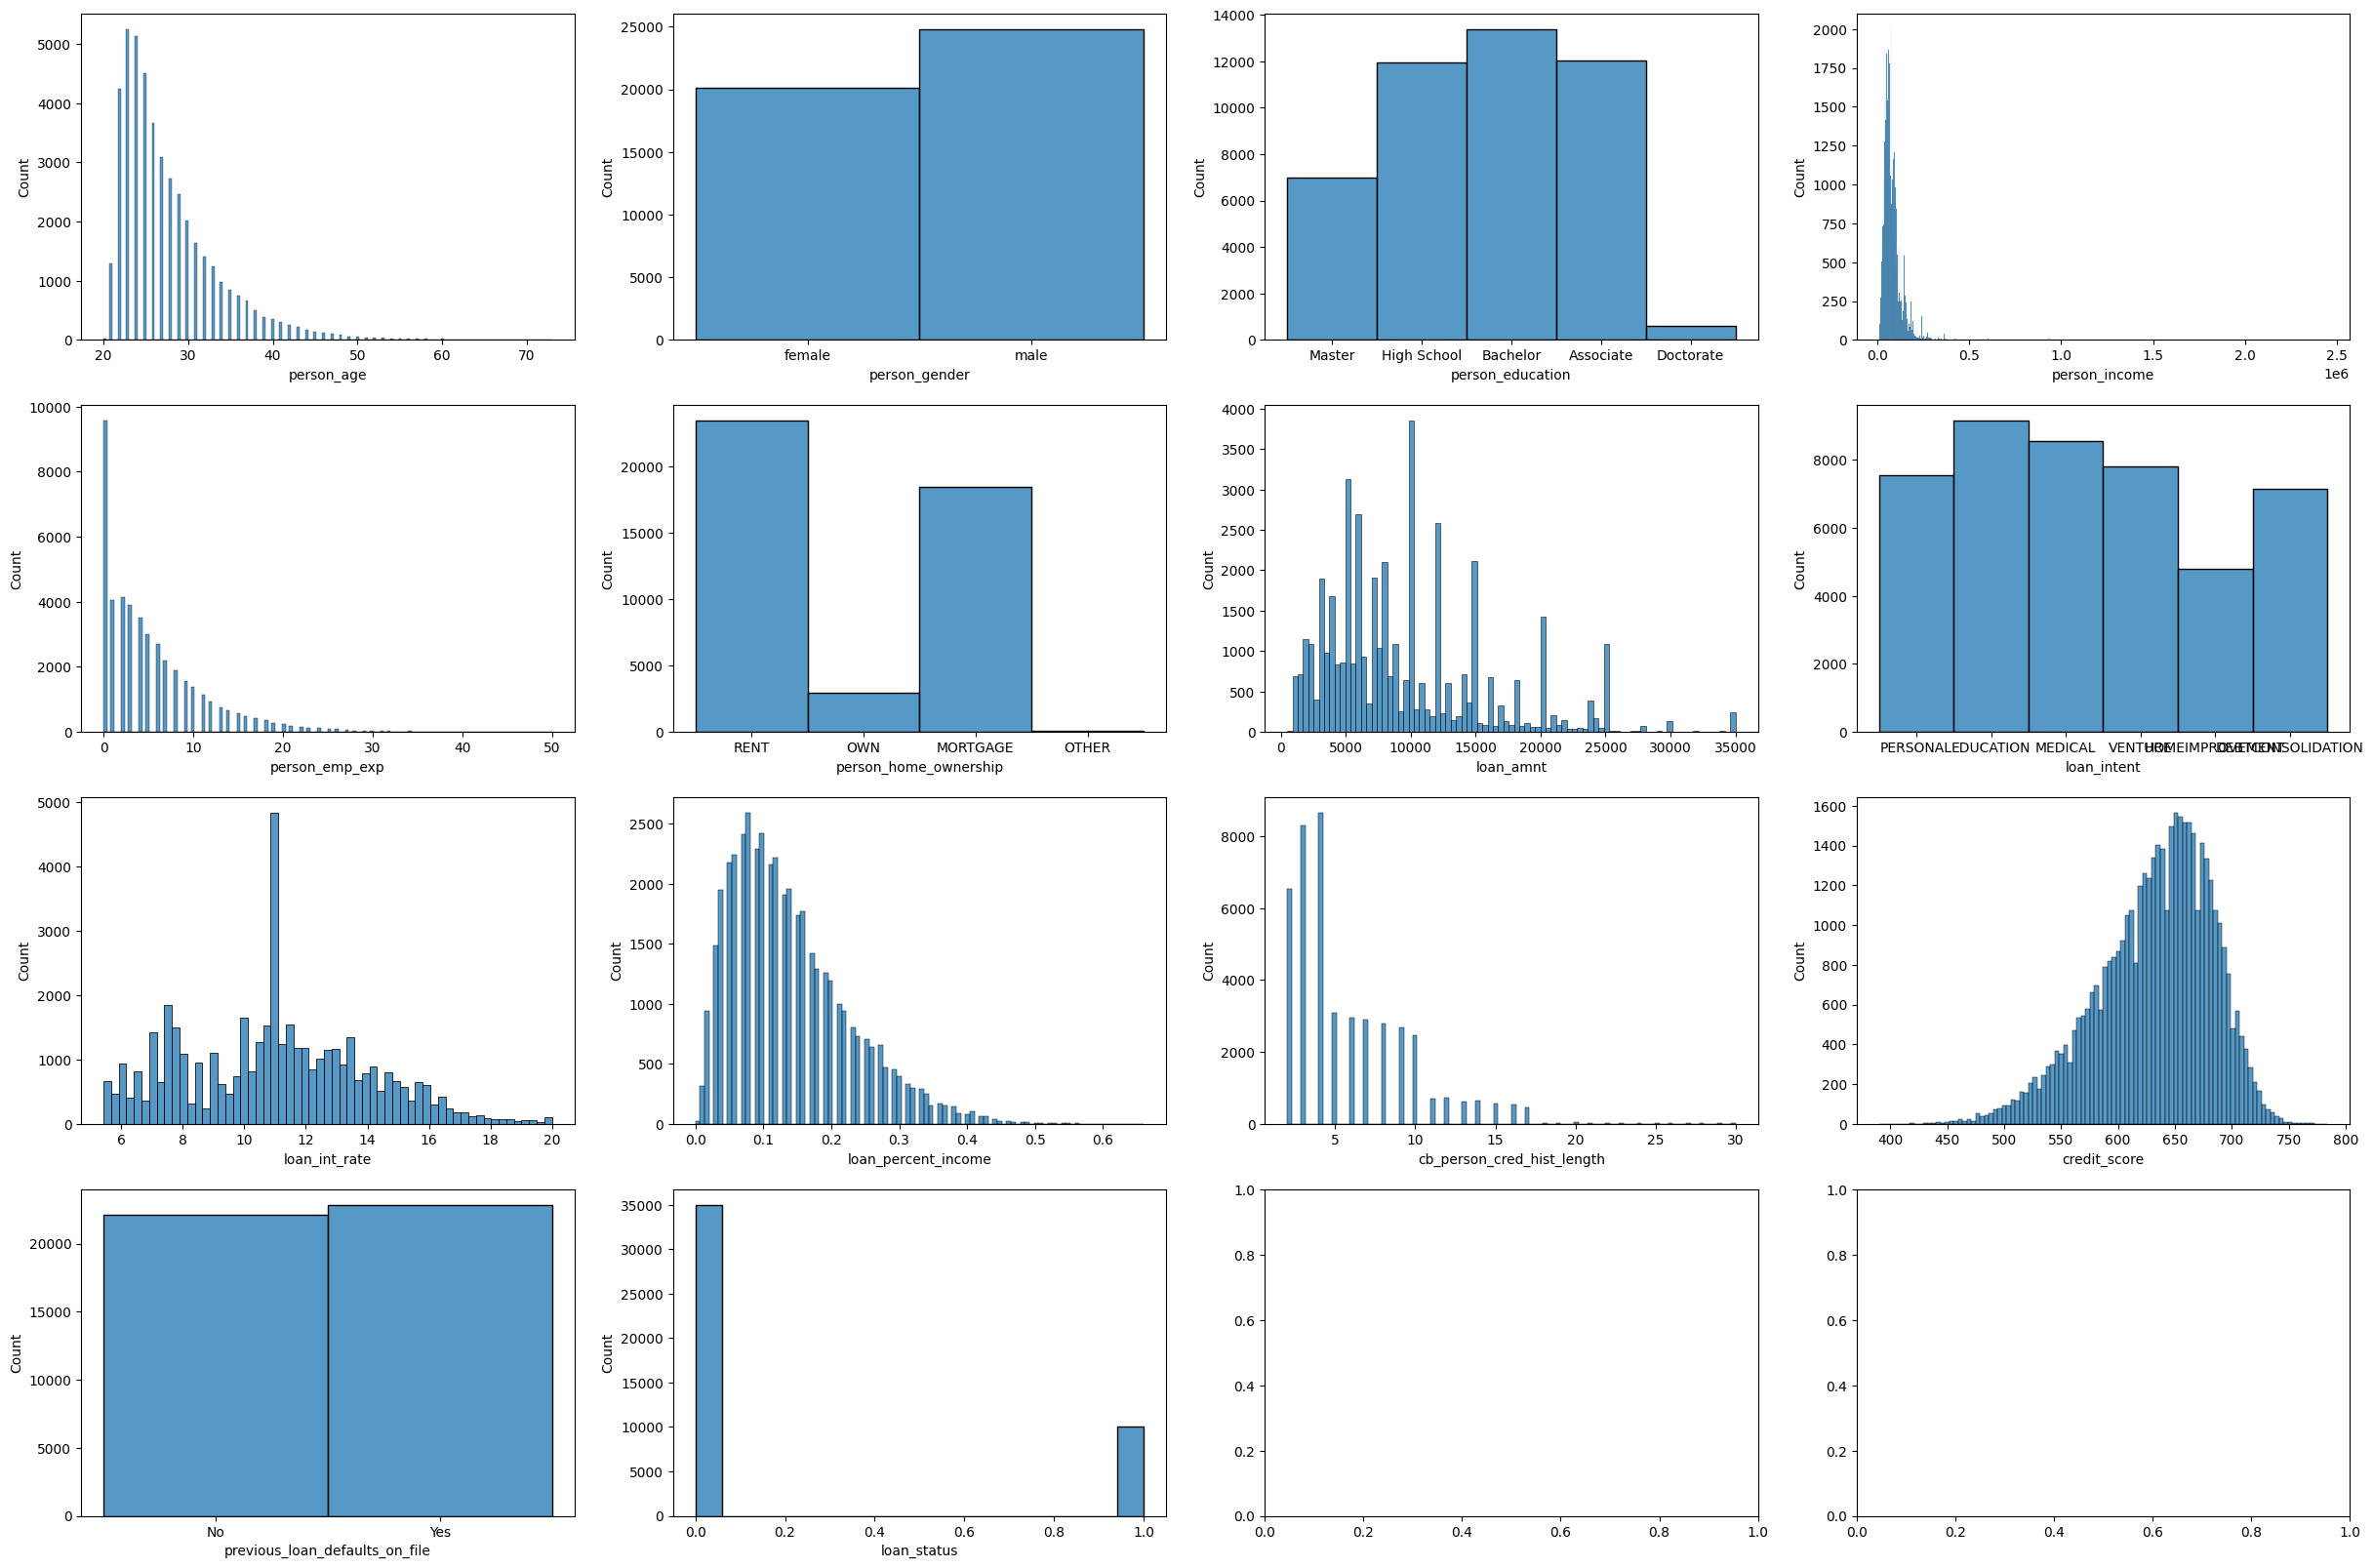

In [110]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize= (30,20))

for col, ax in zip(df, axes.flat):
    sns.histplot(df[col], ax=ax)
plt.show()


**Note**:
1. Nhìn chung, người 22 tuổi đi vay nhiều nhất, người càng lớn tuổi càng ít vay hơn so với người trẻ tuổi.
2. Nam giới vay nhiều hơn so với nữ giới.
3. Người tốt nghiệp đại học đi vay nhiều nhất tiếp theo đó là high school và associate. Cuối cùng là cao học và tiến sĩ.
4. Người có mức lương từ 20k đến 75k là đi vay nhiều nhất, người lương càng cao thì đi vay ít hơn so với người ít lương.
5. Người có số năm kinh nghiệm là 0 đi vay rất nhiều và ít dần khi có số năm kinh nghiệm làm việc nhiều năm. Điều này cho thấy rằng người không có việc làm hoặc không có kinh nghiệm đi vay rất nhiều vì họ không có tiền.
6. Người đi thuê nhà và những người đi thuế chấp nhà cửa chiếm lượng người vay cao nhất. Chủ sở hữu nhà và những nguyên nhân khác thấp nhất.
7. Số tiền được cho phép vay dao động ở mức 5k đến 10k.
8. Số người vay tiền chủ yếu là người vay với mục đích học tập, tiếp theo là về y tế và các dự án. Cuối cùng lần lượt là các khoản vay hợp nhất (tức là khoản cho vay trả góp giúp người vay kết hợp một số khoản vay hiện hữu thành một khoản vay, thay vì nhiều số tiền vay nhỏ, thường với khoản thanh toán hàng tháng thấp hơn.) và cải thiện nhà cửa.
9. Lãi cho người vay nằm trong khoảng 11% và thấp dần về cả 2 phía của biểu đồ histogram.
10. Số tiền vay tính theo phần trăm thu nhập hằng năm nằm trong khoảng 0.12 % , tỷ lệ càng cao thì càng ít người vay.
11. Thời gian lịch sử tín dụng tính theo năm có người vay cao nhất là ở mức 5 trở xuống. Điều này cho thấy người vay mới thường vay ở ngân hàng.
12. Mức điểm tín dụng của người vay nằm ở khoảng 600 đến 700 là cao nhất.
13. Tình trạng người vỡ nợ cao hơn so với người không bị. 
14. Biến mục tiêu trạng thái cho vay có số người được vay tương đối thấp

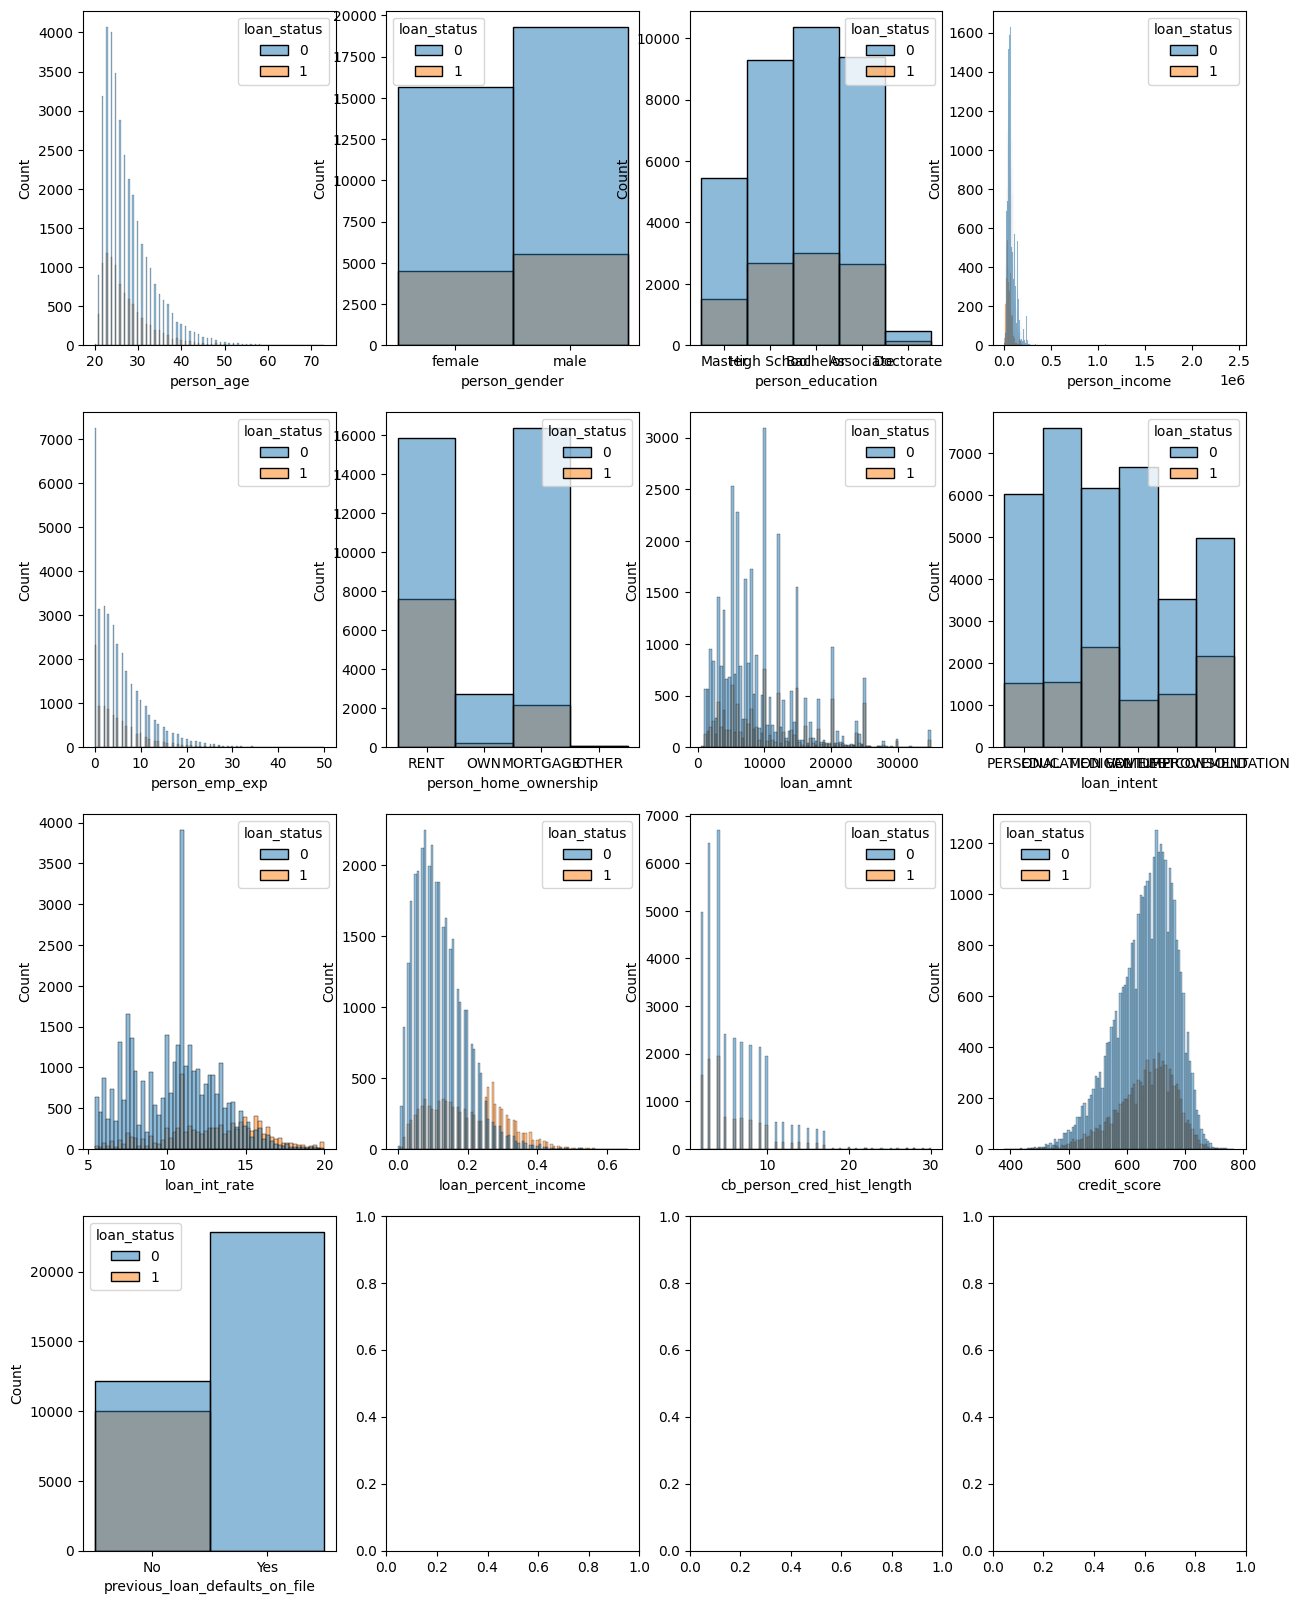

In [111]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15,20))
axs=axs.flat
for i in range(len(df.columns)-1):
    sns.histplot(data=df, x=df.columns[i],hue="loan_status",ax=axs[i])

**NOTE**:
1. Nhìn chung các cột như ``person_age``,``person_gender``,``person_education``,``person_income``,``person_home_ownership``,``loan_amt``,``loan_int_rate`` và ``credit_score`` tỷ lệ thuận với việc được cho vay tức số người càng nhiều trong cái giá trị đó thì số người ở đó được cho vay càng nhiều. Tuy nhiên, để biết chính xác thì ta cần tính tỷ lệ.
2. Những người không bị vỡ nợ được cho vay nhiều nhất còn đối với người vỡ nợ ngân hàng sẽ không cho vay.(điều này đương nhiên).
3. Mức thu nhập theo phần trăm cho vay thì ta thấy rằng người có phần trăm càng cao thì khả năng được duyệt khoản vay khá cao.
4. Đối với những khoản vay về y tế và các khoản vay hợp nhất được duyệt vay nhiều nhất.

In [112]:
def cat_plot(data, var, hue, msg_show=True):
    total_cnt = data[var].count()
    f, ax = plt.subplots(1, 2, figsize=(25, 8))
    hues = [None, hue]
    titles = [f"{var}'s distribution", f"{var}'s distribution by {hue}"]

    for i in range(2):
        sns.countplot(x=data[var], edgecolor='black', hue=hues[i], linewidth=1, ax=ax[i], data=data)
        ax[i].set_xlabel(var, weight='bold', size=15)
        ax[i].set_ylabel('Count', weight='bold', size=15)
        ax[i].spines[['top', 'right']].set_visible(False)
        ax[i].set_title(titles[i], size=18, weight='bold')
        ax[i].set_xticklabels(ax[i].get_xticklabels(), size=13, rotation=45)
        ax[i].set_yticklabels(ax[i].get_yticklabels(), size=13)
        for cont in ax[i].containers:
            if msg_show:
                ax[i].bar_label(cont,  fmt=lambda x: f'{x:.0f} \n {x / total_cnt * 100:2.2f}%',
                                size=12, bbox={'facecolor': 'white', 'boxstyle': 'round'}, label_type='center')
        ax[1].legend([0, 1], title=hue, loc='best', title_fontsize=13)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\268205085.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), size=13, rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\268205085.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels(ax[i].get_yticklabels(), size=13)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\268205085.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), size=13, rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\268205085.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklab

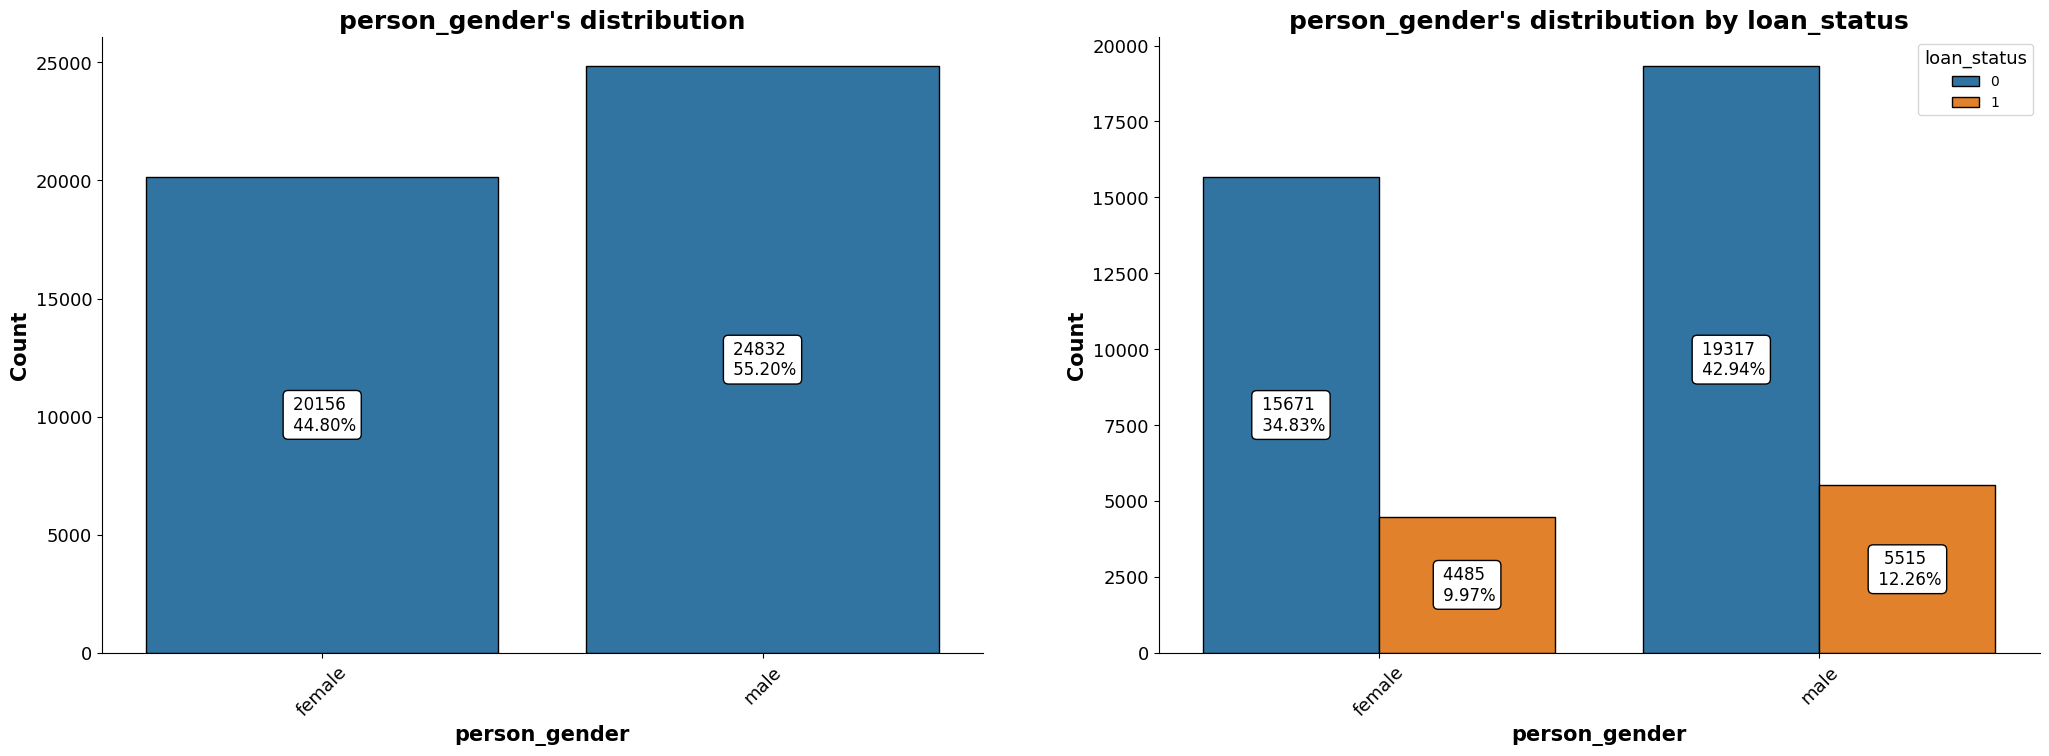

In [113]:
cat_plot(data=df, var='person_gender', hue='loan_status')

C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\268205085.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), size=13, rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\268205085.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels(ax[i].get_yticklabels(), size=13)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\268205085.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), size=13, rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\268205085.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklab

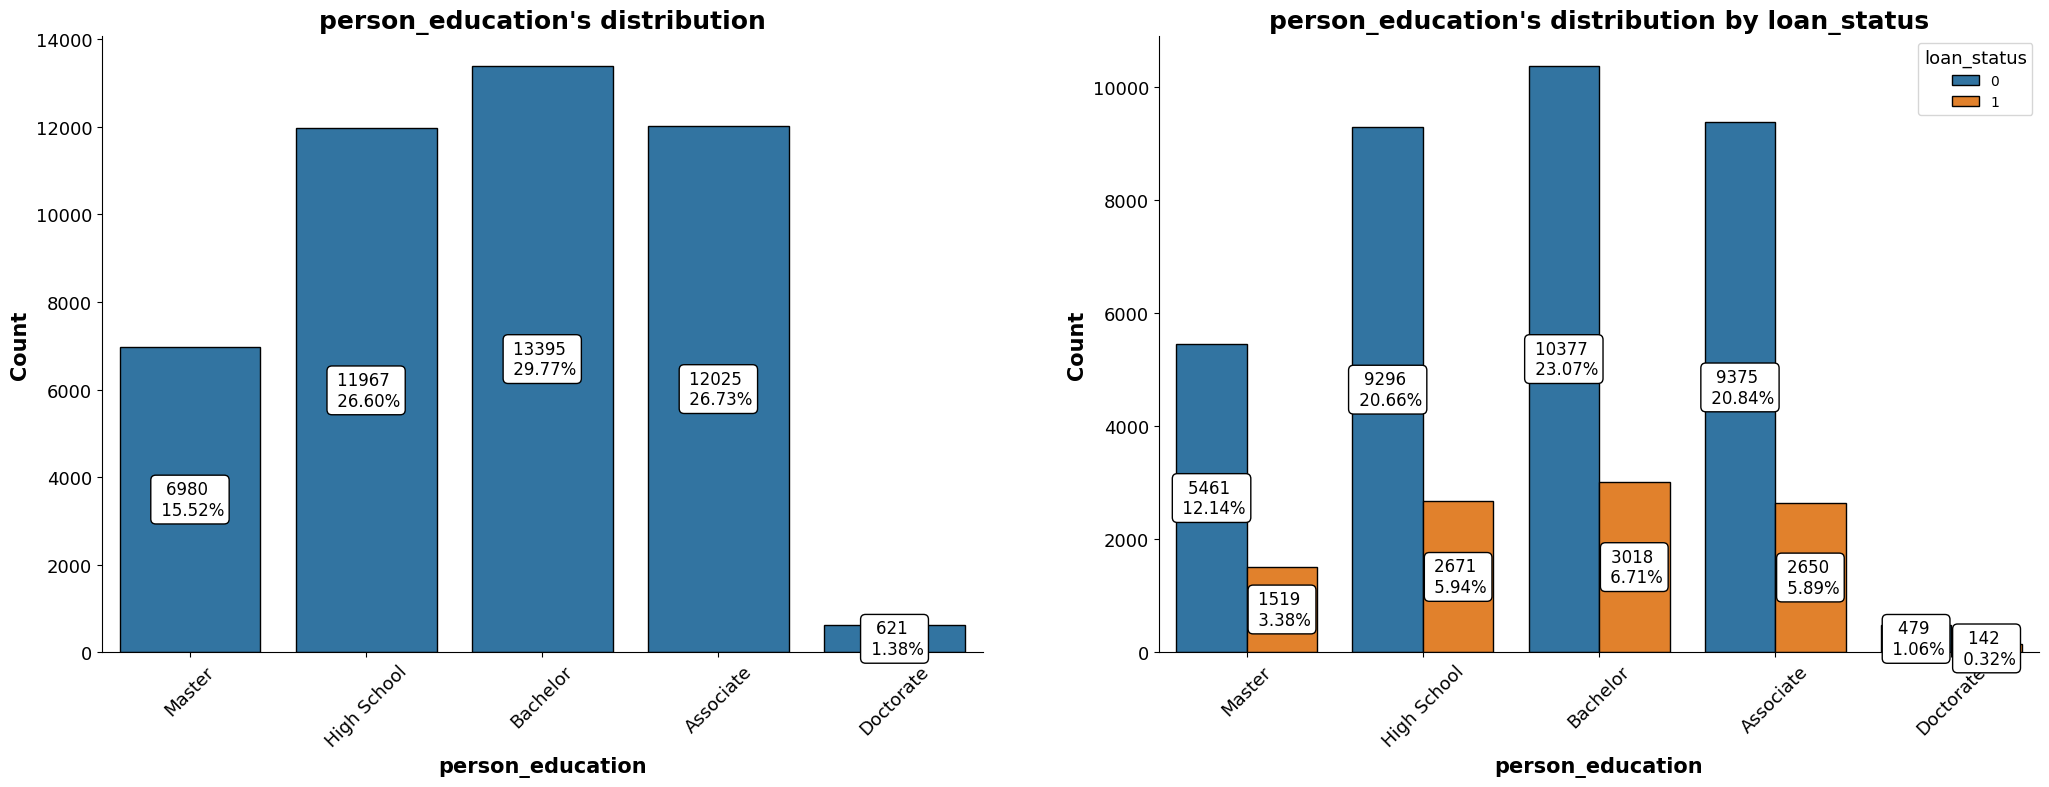

In [114]:
cat_plot(data=df, var='person_education', hue='loan_status')

C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\268205085.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), size=13, rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\268205085.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels(ax[i].get_yticklabels(), size=13)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\268205085.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), size=13, rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\268205085.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklab

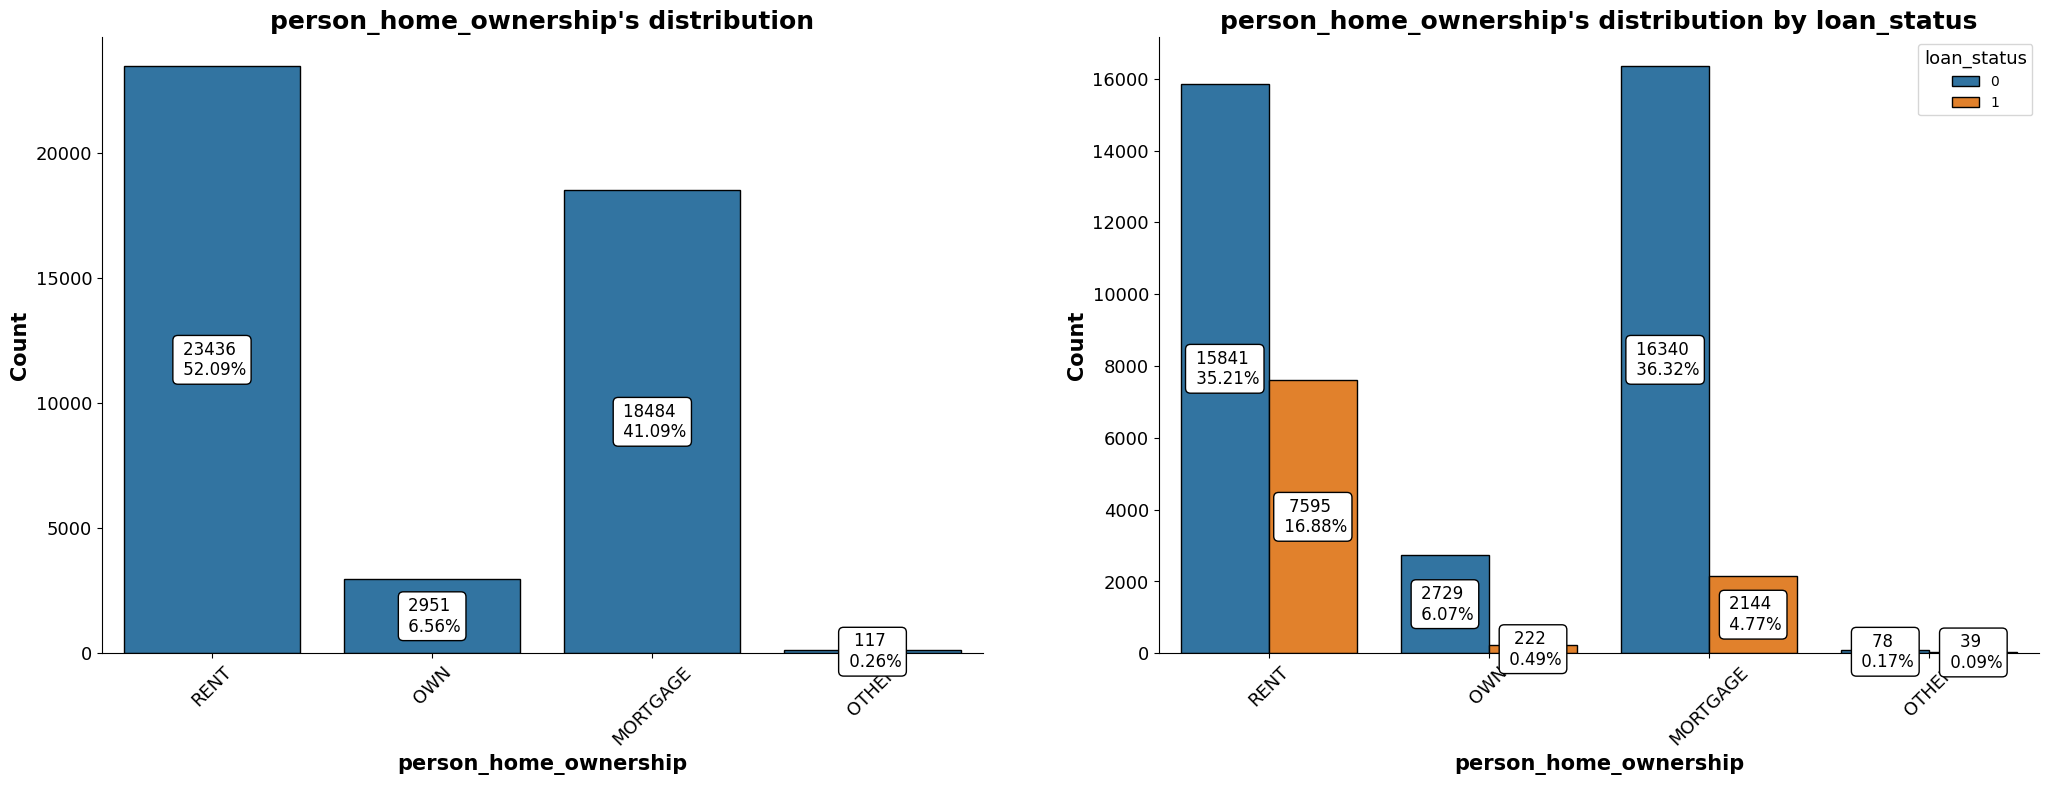

In [115]:
cat_plot(data=df, var='person_home_ownership', hue='loan_status')

C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\268205085.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), size=13, rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\268205085.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels(ax[i].get_yticklabels(), size=13)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\268205085.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), size=13, rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\268205085.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklab

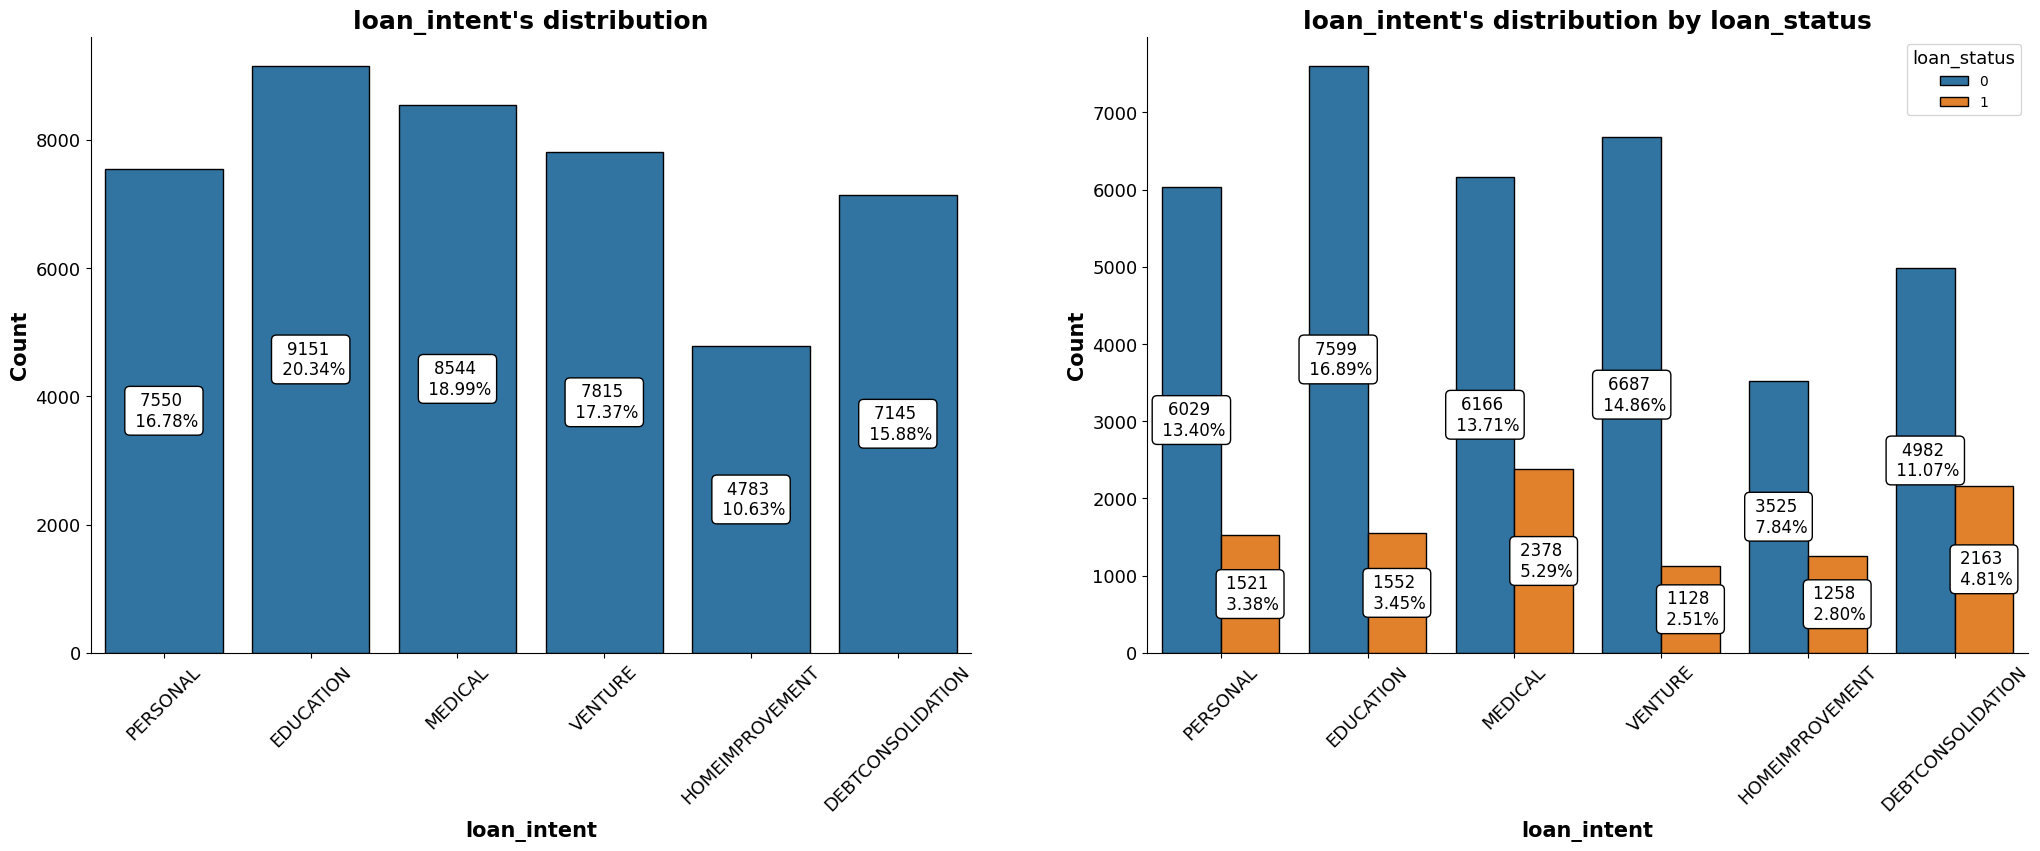

In [116]:
cat_plot(data=df, var='loan_intent', hue='loan_status')

C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\268205085.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), size=13, rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\268205085.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels(ax[i].get_yticklabels(), size=13)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\268205085.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), size=13, rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\268205085.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklab

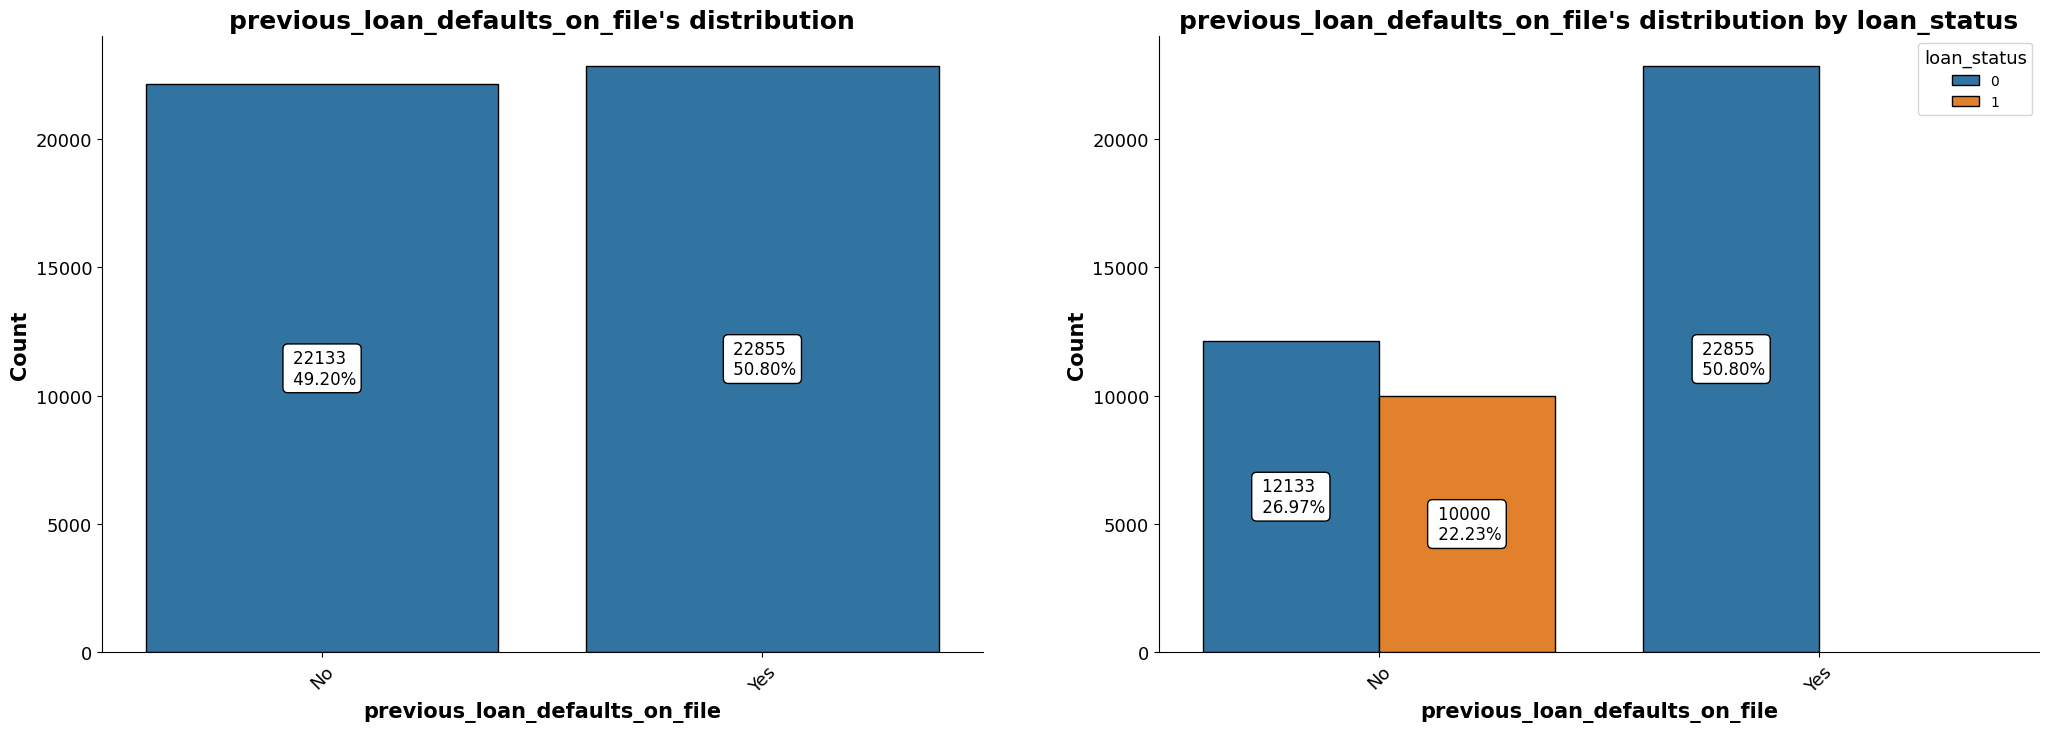

In [117]:
cat_plot(data=df, var='previous_loan_defaults_on_file', hue='loan_status')

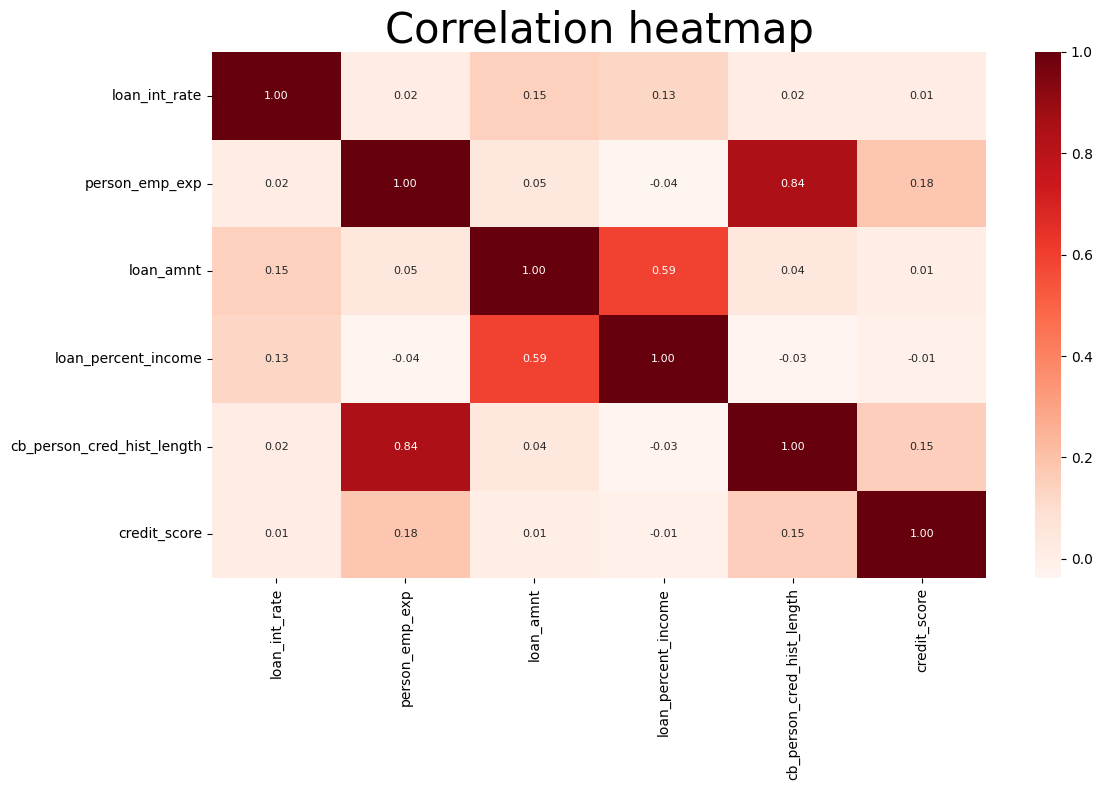

In [118]:
selected_features = ['loan_int_rate', 
                     'person_emp_exp', 
                     'loan_amnt', 
                     'loan_percent_income',
                     'cb_person_cred_hist_length',
                     'credit_score']

plt.figure(figsize=(12,8))
sns.heatmap(df[selected_features].corr(method='pearson'),annot=True,fmt='.2f',annot_kws={"fontsize":8},cmap='Reds')
plt.title('Correlation heatmap',fontsize=30)

plt.tight_layout()
plt.show()

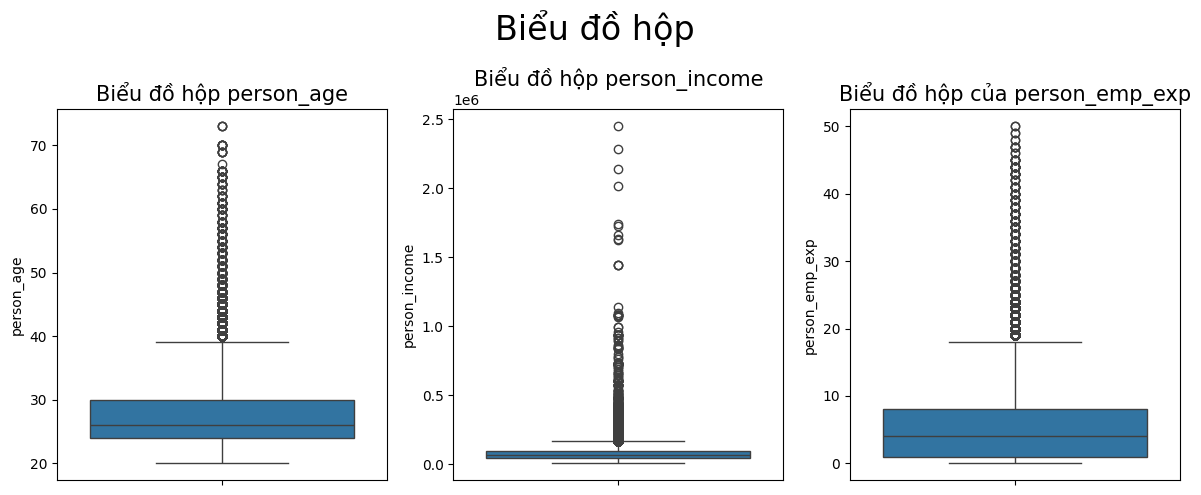

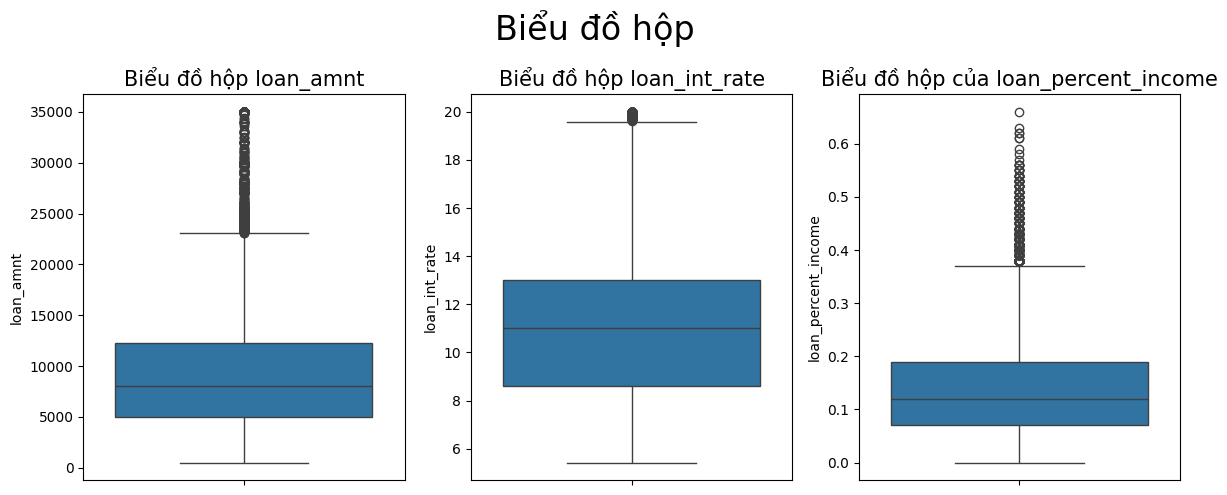

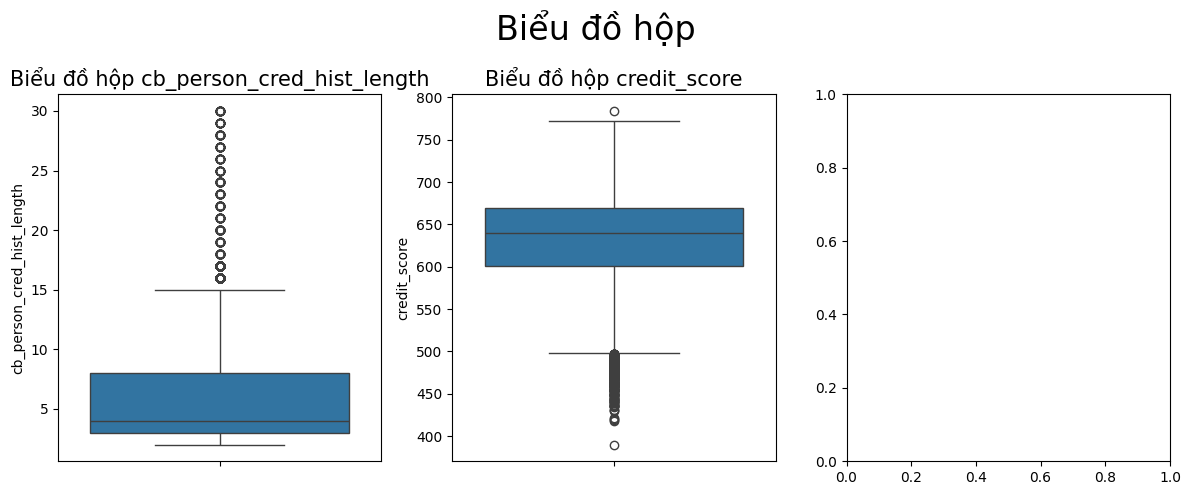

In [119]:
num_features = [col for col in df.columns if df[col].dtypes != 'O']

num_features.remove('loan_status')


def plot_boxplots(data):

    for i in range(3):

        fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,5))
        ax1 = sns.boxplot(data[num_features[i*3]], ax=ax1)
        ax1.set_title('Biểu đồ hộp '+str(num_features[i*3]), fontsize=15)
        ax2 = sns.boxplot(data[num_features[i*3+1]], ax=ax2)
        ax2.set_title('Biểu đồ hộp '+str(num_features[i*3+1]), fontsize=15)
        if i < 2:
            ax3 = sns.boxplot(data[num_features[i*3+2]], ax=ax3)
            ax3.set_title('Biểu đồ hộp của '+str(num_features[i*3+2]), fontsize=15)
    
        fig.suptitle(f"Biểu đồ hộp", fontsize=24)    
    
        plt.tight_layout()


plot_boxplots(df)

In [120]:
#tính phần trăm tỷ lệ ngoại lai của giá trị
def outliers_percentage(data):

    outliers_perc = []

    for k,v in data.items():
        if data[k].dtype != 'O':
            q1 = v.quantile(0.25)
            q3 = v.quantile(0.75)
            irq = q3 - q1
            v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
            perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
            out_tuple = (k,int(perc))
            outliers_perc.append(out_tuple)
            print("Cột %s có giá trị ngoại lai  = %.2f%%" % (k,perc))

outliers_percentage(df[num_features])  

Cột person_age có giá trị ngoại lai  = 5.70%
Cột person_income có giá trị ngoại lai  = 4.92%
Cột person_emp_exp có giá trị ngoại lai  = 3.81%
Cột loan_amnt có giá trị ngoại lai  = 5.22%
Cột loan_int_rate có giá trị ngoại lai  = 0.28%
Cột loan_percent_income có giá trị ngoại lai  = 2.00%
Cột cb_person_cred_hist_length có giá trị ngoại lai  = 3.02%
Cột credit_score có giá trị ngoại lai  = 1.02%


In [121]:
# lược bỏ các giá trị ngoại lai
def remove_outliers_iqr(data, column):

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the data
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data


df01 = df.copy()

for col in num_features:

    df01 = remove_outliers_iqr(df01, col)

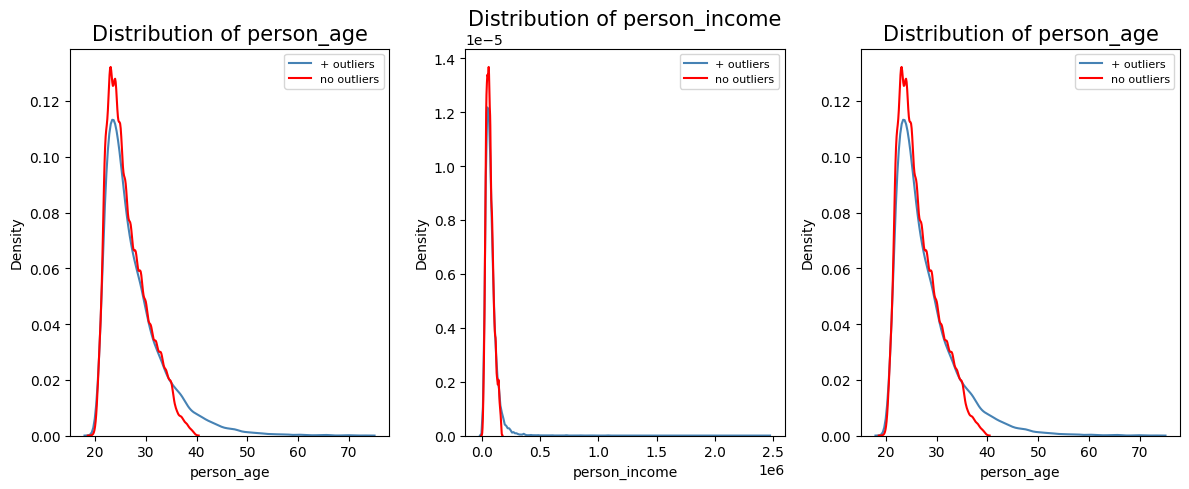

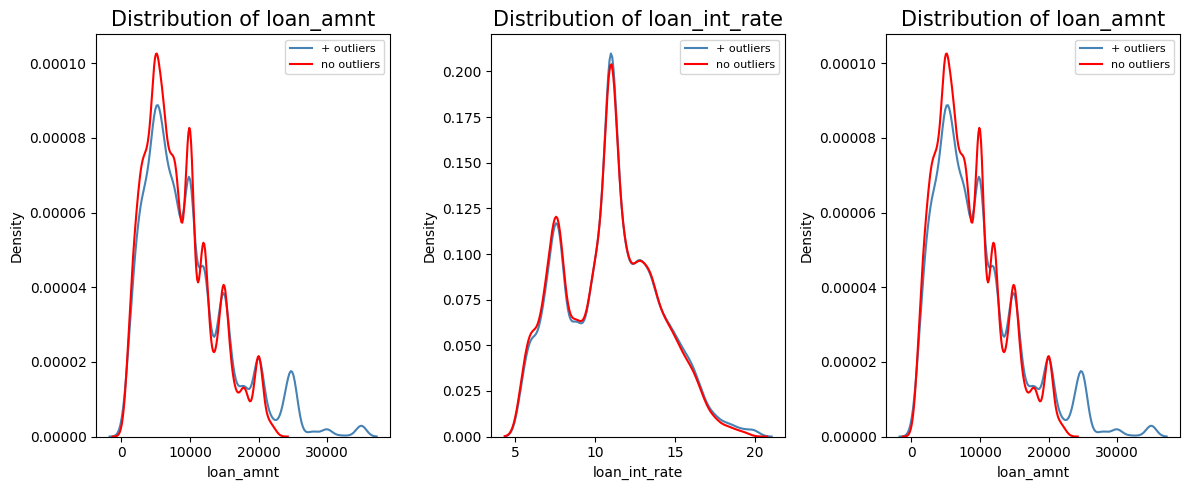

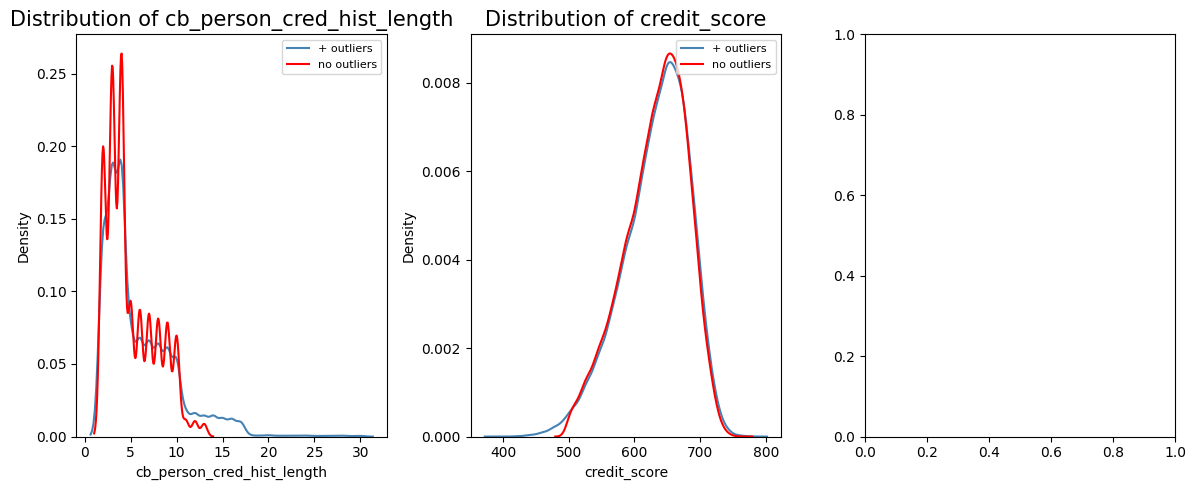

In [122]:
def plot_distributions(data, df01):

    for i in range(3):

        fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,5))

        ax1 = sns.kdeplot(data[num_features[i*3]], ax=ax1, color='steelblue', label='+ outliers')
        ax1 = sns.kdeplot(df01[num_features[i*3]], ax=ax1, color='red', label='no outliers')
        ax1.set_title('Distribution of '+str(num_features[i*3]), fontsize=15)
        ax1.legend(fontsize=8, loc='upper right')

        ax2 = sns.kdeplot(data[num_features[i*3+1]], ax=ax2, color='steelblue', label='+ outliers')
        ax2 = sns.kdeplot(df01[num_features[i*3+1]], ax=ax2, color='red', label='no outliers')
        ax2.set_title('Distribution of '+str(num_features[i*3+1]), fontsize=15)
        ax2.legend(fontsize=8, loc='upper right')

        if i < 2:
            ax3 = sns.kdeplot(data[num_features[i*3]], ax=ax3, color='steelblue', label='+ outliers')
            ax3 = sns.kdeplot(df01[num_features[i*3]], ax=ax3, color='red', label='no outliers')
            ax3.set_title('Distribution of '+str(num_features[i*3]), fontsize=15)
            ax3.legend(fontsize=8, loc='upper right')
    
        plt.tight_layout()


plot_distributions(df, df01)

In [123]:
df01

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1
19,24.0,female,Master,14283.0,1,MORTGAGE,1750.0,EDUCATION,10.99,0.12,2.0,679,No,1
23,24.0,female,Bachelor,13866.0,0,OWN,1500.0,PERSONAL,7.29,0.11,3.0,600,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44990,31.0,male,Master,136832.0,9,RENT,12319.0,PERSONAL,16.92,0.09,7.0,722,No,1
44993,27.0,female,High School,35512.0,4,RENT,5000.0,PERSONAL,15.83,0.14,5.0,505,No,1
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1


In [124]:
### Label encoding ###
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
encoder = LabelEncoder()

for col in ['person_gender', 'previous_loan_defaults_on_file']:

    df01[col] = encoder.fit_transform(df01[col])

### One-hot encoding ###    
df01 = pd.get_dummies(df01)

df01.head()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,...,False,False,True,False,False,True,False,False,False,False
5,21.0,0,12951.0,0,2500.0,7.14,0.19,2.0,532,0,...,False,False,True,False,False,False,False,False,False,True
9,21.0,0,12739.0,0,1600.0,14.74,0.13,3.0,640,0,...,False,False,True,False,False,False,False,False,False,True
19,24.0,0,14283.0,1,1750.0,10.99,0.12,2.0,679,0,...,True,False,False,False,False,True,False,False,False,False
23,24.0,0,13866.0,0,1500.0,7.29,0.11,3.0,600,1,...,False,False,True,False,False,False,False,False,True,False


In [125]:
std_scaler = StandardScaler()

STD_list = ['person_age', 
            'person_income',
            'person_emp_exp',
            'loan_amnt', 
            'loan_int_rate', 
            'loan_percent_income',
            'cb_person_cred_hist_length', 
            'credit_score']

df01[STD_list] = std_scaler.fit_transform(df01[STD_list])

df01.head()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,-1.397526,0,-1.830558,-1.049912,-1.521531,0.088362,-0.694715,-1.131487,-2.686504,1,...,False,False,True,False,False,True,False,False,False,False
5,-1.397526,0,-1.809362,-1.049912,-1.207867,-1.277781,0.841907,-1.131487,-2.099303,0,...,False,False,True,False,False,False,False,False,False,True
9,-1.397526,0,-1.816079,-1.049912,-1.396065,1.317892,0.003749,-0.754084,0.165618,0,...,False,False,True,False,False,False,False,False,False,True
19,-0.621788,0,-1.767160,-0.792046,-1.364699,0.037132,-0.135944,-1.131487,0.983506,0,...,True,False,False,False,False,True,False,False,False,False
23,-0.621788,0,-1.780372,-1.049912,-1.416976,-1.226551,-0.275637,-0.754084,-0.673241,1,...,False,False,True,False,False,False,False,False,True,False


In [126]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = df01.drop('loan_status', axis=1)
y = df01['loan_status']
smote = SMOTE()
X, y = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [127]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((46041, 25), (11511, 25), (46041,), (11511,))

# Lựa chọn mô hình 

## Các thuộc tính quan trọng 

In [128]:
# Dùng mô hình random forest để xem các thuộc tính quan trọng
random_forest = RandomForestClassifier(random_state=1, max_depth=20)
random_forest.fit(X_train, y_train)

importances = pd.DataFrame({'feature':X_train.columns, 'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance', ascending=False)
importances.head(15)

,feature,importance
9,previous_loan_defaults_on_file,0.373
5,loan_int_rate,0.136
6,loan_percent_income,0.105
2,person_income,0.087
18,person_home_ownership_RENT,0.046
4,loan_amnt,0.041
8,credit_score,0.035
0,person_age,0.029
7,cb_person_cred_hist_length,0.028
3,person_emp_exp,0.025


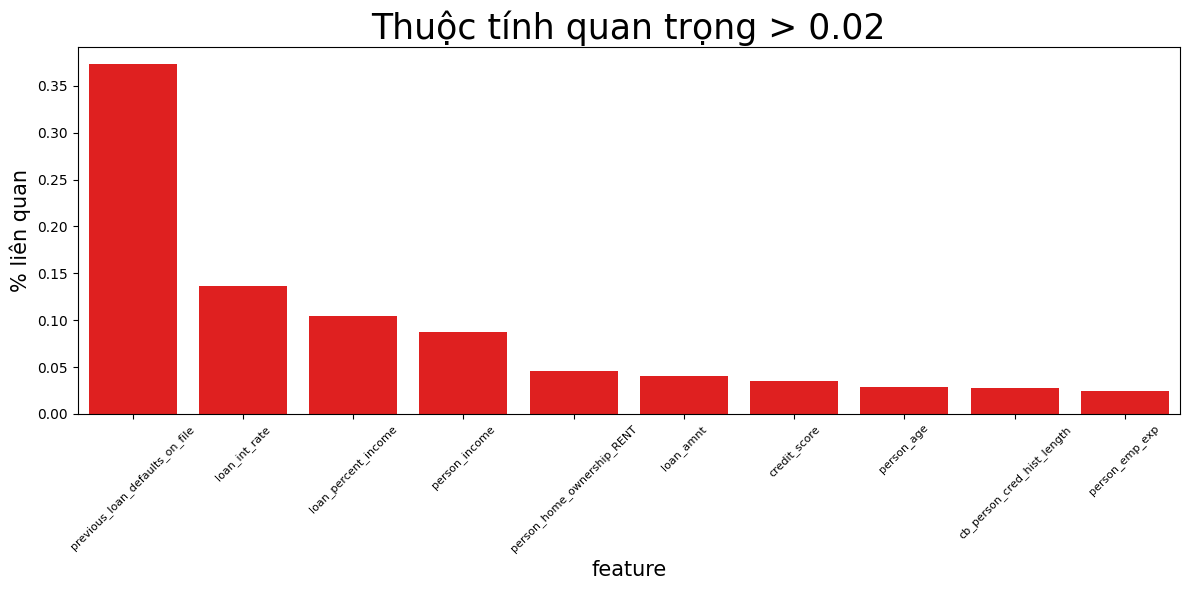

In [129]:
plt.figure(figsize=(12,6))

sns.barplot(importances[importances['importance'] > 0.02], x='feature', y='importance', color='red')

plt.title('Thuộc tính quan trọng > 0.02', fontsize=25)
plt.xlabel('feature', fontsize=15)
plt.xticks(fontsize=8, rotation=45)
plt.ylabel('% liên quan', fontsize=15)
    
plt.tight_layout()
plt.show()

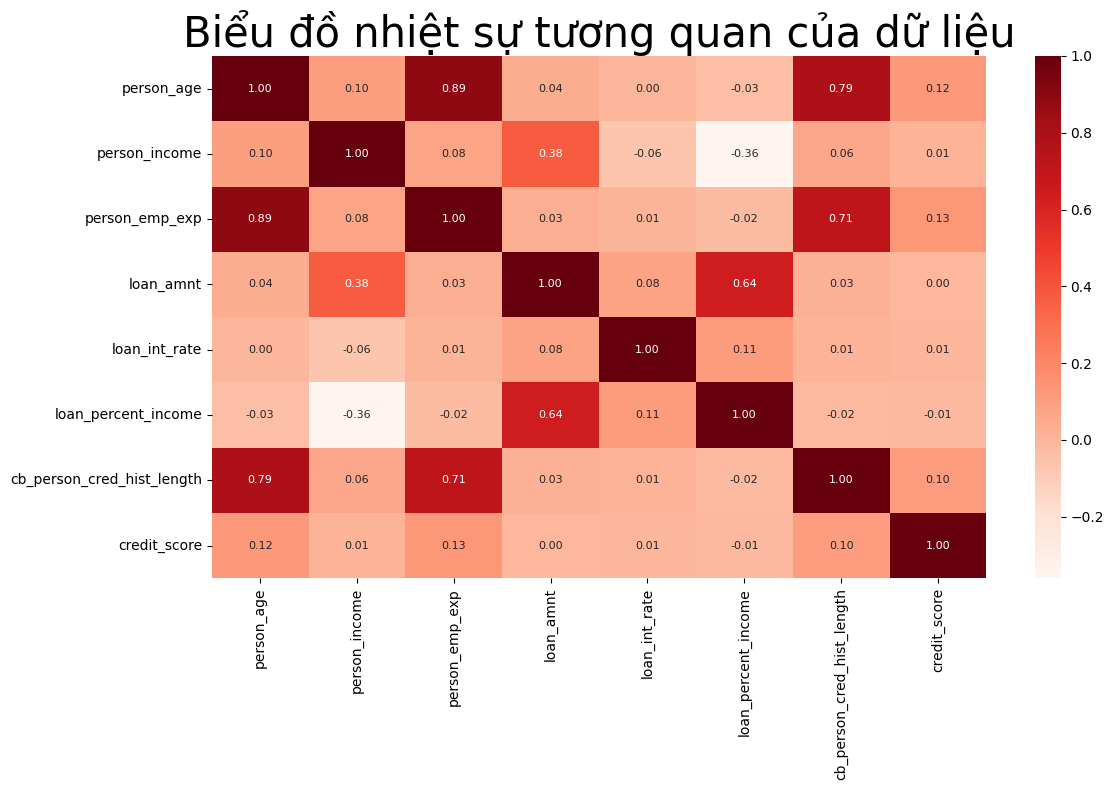

In [130]:
feat_list = ['person_age', 'person_income', 'person_emp_exp',
             'loan_amnt', 'loan_int_rate', 'loan_percent_income',
             'cb_person_cred_hist_length', 'credit_score']

plt.figure(figsize=(12,8))
sns.heatmap(df01[feat_list].corr(method='pearson'), annot=True, fmt='.2f', annot_kws={"fontsize":8}, cmap='Reds')
plt.title('Biểu đồ nhiệt sự tương quan của dữ liệu', fontsize=30)

plt.tight_layout()
plt.show()

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#Khai báo các thuật toán phân lớp sử dụng
dict_classifiers = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=5000),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(gamma = 'auto'),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [132]:
no_classifiers = len(dict_classifiers.keys())



#Xây dựng hàm huấn luyện theo các thuật toán
#Xác định thời gian chạy khi huấn luyện của mỗi thuật toán
#Cho biết Độ chính xác của mô hình khi chạy huấn luyện
#Thời gian chạy huấn luyện của mô hình
def batch_classify(X_train, y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.process_time()
        classifier.fit(X_train, y_train)
        t_end = time.process_time()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [133]:
#Thực hiện việc huấn luyện các mô hình với dữ liệu huấn luyện
df_results = batch_classify(X_train, y_train,verbose=True)
print(df_results.sort_values(by='train_score', ascending=False))

C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\1196637582.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Logistic Regression' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_results.loc[count,'classifier'] = key


trained Logistic Regression in 0.75 s
trained Nearest Neighbors in 0.02 s
trained Linear SVM in 48.20 s
trained Gradient Boosting Classifier in 10.69 s
trained Decision Tree in 0.34 s
trained Random Forest in 1.16 s
trained Neural Net in 14.25 s
trained Naive Bayes in 0.03 s
                     classifier  train_score  training_time
4                 Decision Tree     1.000000       0.343750
5                 Random Forest     0.999522       1.156250
1             Nearest Neighbors     0.944984       0.015625
3  Gradient Boosting Classifier     0.918659      10.687500
2                    Linear SVM     0.913425      48.203125
6                    Neural Net     0.902869      14.250000
0           Logistic Regression     0.900784       0.750000
7                   Naive Bayes     0.829739       0.031250


## Vấn đề Overfitting trong xây dựng mô hình ML
---
Overfitting không phải là một thuật toán trong Machine Learning. Nó là một hiện tượng không mong muốn thường gặp, người xây dựng mô hình Machine Learning cần nắm được các kỹ thuật để tránh hiện tượng này.

Overfitting là hiện tượng mô hình tìm được quá khớp với dữ liệu training. Việc quá khớp này có thể dẫn đến việc dự đoán nhầm nhiễu, và chất lượng mô hình không còn tốt trên dữ liệu test nữa. Dữ liệu test được giả sử là không được biết trước, và không được sử dụng để xây dựng các mô hình Machine Learning.

Về cơ bản, overfitting xảy ra khi mô hình quá phức tạp để mô phỏng training data. Điều này đặc biệt xảy ra khi lượng dữ liệu training quá nhỏ trong khi độ phức tạp của mô hình quá cao.
![alt text](https://machinelearningcoban.com/assets/15_overfitting/linreg_val.png)

[link tham khảo thêm](https://machinelearningcoban.com/2017/03/04/overfitting/)

In [134]:
#SO SÁNH ĐỘ CHÍNH XÁC CỦA MÔ HÌNH ML TRONG KHI TRAIN VÀ KHI TEST VỚI 2 MÔ HÌNH CÓ ĐỘ CHÍNH XÁC CAO NHÂT
# Model: Desicion Tree - acc = 100% khi Train
# Model: Random Forest - acc = 99.7% khi Train

print('Model: Desicion Tree')
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train, y_train)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 3)
print("Độ chính xác của mô hình Decision tree trên tập Train: ", acc_decision_tree, "%")
#--------------------------------
#Sử dụng mô hình Train chạy dữ liệu TEST và đánh giá độ chính xác
Y_pred = decision_tree.predict(X_test)
from sklearn.metrics import accuracy_score
print("Độ chính xác của mô hình Decision tree trên tập Test:", round(accuracy_score(y_test,Y_pred)*100,2))

Model: Desicion Tree
Độ chính xác của mô hình Decision tree trên tập Train:  100.0 %
Độ chính xác của mô hình Decision tree trên tập Test: 91.66


In [136]:
print('Model: Random Forest')
random_forest = RandomForestClassifier(criterion='entropy', n_estimators=100)
random_forest.fit(X_train, y_train)
#Đánh giá độ chính xác trên tập huấn luyện:
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 3)
print("Độ chính xác của mô hình Random Forest trên tập Train: ", acc_random_forest, "%")
#---------------------------------------------------------------------------------------
#Sử dụng mô hình Train chạy dữ liệu TEST và đánh giá độ chính xác
Y_pred = random_forest.predict(X_test)
print("Độ chính xác của mô hình Random Forest trên tập Test:", round(accuracy_score(y_test,Y_pred)*100,2))

Model: Random Forest
Độ chính xác của mô hình Random Forest trên tập Train:  100.0 %
Độ chính xác của mô hình Random Forest trên tập Test: 95.76


In [137]:
# Sử dụng  Cross-validation để giải quyết vấn đề overfitting.
#Mỗi thuật toán thực hiện 3 lần huấn luyện trên tập TRAIN với kỹ thuật Cross Validation,
#
#---------------------------------------------------------------

from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)
log_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC(gamma='auto')
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=5)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=5)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=5)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=5)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=5)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=5)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=5)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'],
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [138]:
#Hiển thị kết quả của các thuật toán với kỹ thuật Cross Validation
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
5,Rand FC,0.944224
4,Grad B CLF,0.917139
2,KNN,0.911666
1,SVC,0.909515
3,Dec Tree,0.906170
6,Neural Classifier,0.902261
7,Naives Bayes,0.902261
0,Logistic Reg.,0.900610


In [139]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

#grad_clf = GradientBoostingClassifier()
y_train_pred = cross_val_predict(grad_clf, X_train, y_train, cv=5)
from sklearn.metrics import accuracy_score
#grad_clf.fit(X_train, y_train)
#Độ chính xác tính trên tập TRAIN:
print ("TRAIN: Gradient Boost Classifier accuracy is %2.4f" % accuracy_score(y_train, y_train_pred))

TRAIN: Gradient Boost Classifier accuracy is 0.9171


In [142]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

#neural_clf = MLPClassifier(alpha=1)
y_train_pred_n = cross_val_predict(rand_clf, X_train, y_train, cv=5)
from sklearn.metrics import accuracy_score
#neural_clf.fit(X_train, y_train)
#Độ chính xác tính trên tập TRAIN:
print ("TRAIN: Random Forest Classifer accuracy is %2.4f" % accuracy_score(y_train, y_train_pred_n))

TRAIN: Random Forest Classifer accuracy is 0.9437


In [151]:
rand_clf.fit(X_train, y_train)
y_predicted = rand_clf.predict(X_test)

In [152]:
#Hàm predict cho biết kết quả dự đoán của mô hình phân lớp là class nào?
# (0 hay 1 trong trường hợp phân lớp nhị phân)
y_predicted = rand_clf.predict(X_test)
y_predicted

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [153]:
y_predicted_probas =rand_clf.predict_proba(X_test)
y_predicted_probas

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       ...,
       [0.        , 1.        ],
       [0.72222222, 0.27777778],
       [0.55555556, 0.44444444]])

In [154]:
from sklearn.metrics import accuracy_score
print("TEST: Random Forest Classifier accuracy is %2.4f" % accuracy_score(y_test,y_predicted))

TEST: Random Forest Classifier accuracy is 0.9527


##  Confusion matrix
---
Cách tính sử dụng accuracy như ở trên chỉ cho chúng ta biết được bao nhiêu phần trăm lượng dữ liệu được phân loại đúng mà không chỉ ra được cụ thể mỗi loại được phân loại như thế nào, lớp nào được phân loại đúng nhiều nhất, và dữ liệu thuộc lớp nào thường bị phân loại nhầm vào lớp khác. Để có thể đánh giá được các giá trị này, chúng ta sử dụng một ma trận được gọi là confusion matrix.

Về cơ bản, confusion matrix thể hiện có bao nhiêu điểm dữ liệu thực sự thuộc vào một class, và được dự đoán là rơi vào một class. Để hiểu rõ hơn, hãy xem hình minh họa trong phần trực quan hóa.

In [148]:
#Hiển thị confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
print('Confusion matrix:')
print(cnf_matrix)

Confusion matrix:
[[5439  334]
 [ 214 5524]]


In [171]:
len(y_test)

11511

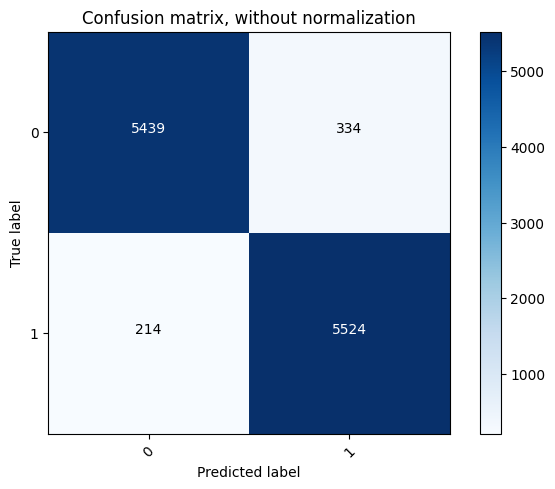

In [172]:

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#f, ax = plt.subplots(1,2, figsize=(14,6))
# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

Confusion matrix là một ma trận vuông với kích thước mỗi chiều bằng số lượng lớp dữ liệu. Giá trị tại hàng thứ i, cột thứ j là số lượng điểm lẽ ra thuộc vào class i nhưng lại được dự đoán là thuộc vào class j.
Như vậy, nhìn vào confusion matrix (without normalization):
* Hàng (0),cột (0): cho biết số điểm thuộc lớp 0 được phân đúng vào lớp 0 (5439 điểm).
* Hàng (0), cột (1): Số điểm thuộc lớp 0 nhưng lại được phân vào lớp 1 (phân lớp sai) 334 điểm.
* Hàng (1), Cột (0): Số điểm thuộc lớp 1 nhưng lại được phân vào lớp 0 (phân lớp sai) 214 điểm
* Hàng (1), cột (1): Số điểm thuộc lớp 1 được phân đúng vào lớp 1 (5524 điểm)

Chúng ta có thể suy ra ngay rằng tổng các phần tử trong toàn ma trận này chính là số điểm trong tập TEST. Các phần tử trên đường chéo của ma trận là số điểm được phân loại đúng của mỗi lớp dữ liệu. Từ đây có thể suy ra accuracy chính bằng tổng các phần tử trên đường chéo chia cho tổng các phần tử của toàn ma trận.

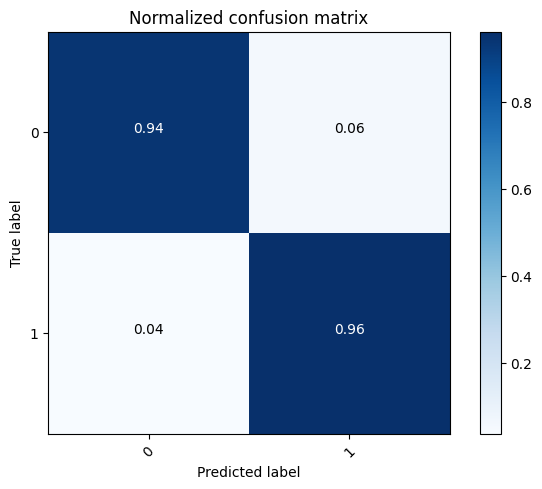

In [173]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

Để có cái nhìn rõ hơn, ta có thể dùng normalized confuion matrix, tức confusion matrix được chuẩn hoá. Để có normalized confusion matrix, ta lấy mỗi hàng của unnormalized confusion matrix sẽ được chia cho tổng các phần tử trên hàng đó. Như vậy, ta có nhận xét rằng tổng các phần tử trên một hàng của normalized confusion matrix luôn bằng 1. Điều này thường không đúng trên mỗi cột. Confusion matrix thường được minh hoạ bằng màu sắc để có cái nhìn rõ ràng hơn.
Với các bài toán với nhiều lớp dữ liệu, cách biểu diễn bằng màu này rất hữu ích. Các ô màu đậm thể hiện các giá trị cao. Một mô hình tốt sẽ cho một confusion matrix có các phần tử trên đường chéo chính có giá trị lớn, các phần tử còn lại có giá trị nhỏ.

##  Precision, Recal, F1 score
---

Thư viện yellobrick cho phép trực quan hóa các kết quả của mô hình ML

[link webstie Yellowbrick](https://www.scikit-yb.org/en/latest/)


Báo cáo phân loại
Trình hiển thị báo cáo phân loại hiển thị precision, recall, F1, và support scores cho mô hình. Để hỗ trợ việc diễn giải và phát hiện vấn đề dễ dàng hơn, báo cáo tích hợp điểm số với bản đồ nhiệt được mã hóa màu. Tất cả các bản đồ nhiệt đều nằm trong phạm vi (0,0, 1,0) để tạo điều kiện so sánh dễ dàng các mô hình phân loại trên các báo cáo phân loại khác nhau.

In [174]:
import numpy as np 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import ClassPredictionError


import warnings
warnings.filterwarnings('ignore')

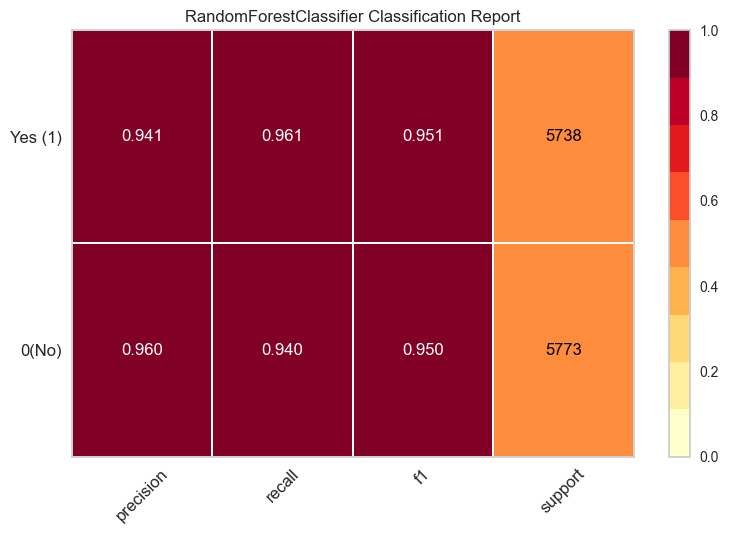

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [175]:
# Specify the target classes
classes = ["0(No)", "Yes (1)"]

visualizer = ClassificationReport(rand_clf, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof()                       # Draw/show/poof the data

Báo cáo phân loại hiển thị bản trình bày các số liệu phân loại chính trên cơ sở từng lớp. Điều này mang lại trực giác sâu sắc hơn về hành vi của bộ phân loại đối với độ chính xác tổng thể, điều này có thể che giấu những điểm yếu về chức năng trong một lớp của bài toán nhiều lớp. Báo cáo phân loại trực quan được sử dụng để so sánh các mô hình phân loại với các mô hình chọn lọc “đỏ hơn”, ví dụ: có số liệu phân loại mạnh hơn hoặc cân bằng hơn.

Các số liệu được xác định theo kết quả dương tính đúng và sai cũng như âm tính đúng và sai. Tích cực và tiêu cực trong trường hợp này là tên chung cho các lớp của bài toán phân loại nhị phân. Trong ví dụ trên, chúng ta sẽ xem xét có người ở đúng và sai và không có người ở đúng và sai. Do đó, giá trị dương thực sự là khi lớp thực tế cũng dương như lớp ước tính. Kết quả dương tính giả là khi lớp thực tế âm nhưng lớp ước tính là dương. Sử dụng thuật ngữ này, các thước đo được định nghĩa như sau:

#### Precision
Độ chính xác là khả năng của người phân loại không gắn nhãn một trường hợp dương tính mà thực tế là âm tính. Đối với mỗi lớp, nó được định nghĩa là tỷ lệ của kết quả dương tính đúng với tổng số kết quả dương tính đúng và sai. Nói cách khác, “đối với tất cả các trường hợp được phân loại là dương tính, bao nhiêu phần trăm là đúng?”

#### recall
Nhớ lại là khả năng của một bộ phân loại để tìm thấy tất cả các trường hợp tích cực. Đối với mỗi loại, nó được định nghĩa là tỷ lệ của kết quả dương tính thực với tổng số kết quả dương tính thực và âm tính giả. Nói cách khác, “đối với tất cả các trường hợp thực sự dương tính, bao nhiêu phần trăm được phân loại chính xác?”

#### f1-score
Điểm F1 là giá trị trung bình hài hòa có trọng số của độ chính xác và khả năng thu hồi sao cho điểm tốt nhất là 1,0 và điểm tệ nhất là 0,0. Nói chung, điểm F1 thấp hơn các thước đo độ chính xác vì chúng đưa độ chính xác và khả năng thu hồi vào tính toán của chúng. Theo nguyên tắc chung, nên sử dụng giá trị trung bình có trọng số của F1 để so sánh các mô hình phân loại, chứ không phải độ chính xác toàn cầu.

#### Support
Hỗ trợ là số lần xuất hiện thực tế của lớp trong tập dữ liệu đã chỉ định. Hỗ trợ không cân bằng trong dữ liệu huấn luyện có thể chỉ ra điểm yếu về cấu trúc trong điểm số được báo cáo của bộ phân loại và có thể cho thấy sự cần thiết phải lấy mẫu phân tầng hoặc tái cân bằng. Hỗ trợ không thay đổi giữa các mô hình mà thay vào đó chẩn đoán quá trình đánh giá.

### Confusion Matrix
Mục đích chính của Confusion Matrix là để xem mô hình của ta hoạt động như thế nào khi phân loại khách hàng tiềm năng có khả năng đăng ký tiền gửi có kỳ hạn. Chúng ta sẽ thấy trong ma trận nhầm lẫn bốn thuật ngữ là Dương tính thật, Dương tính giả, Âm tính thật và Âm tính giả.

Positive/Negative: Loại Lớp (nhãn) ["No", "Yes"] True/False: Phân loại đúng hoặc sai theo mô hình.

True Negatives (Top-Left Square) phân loại chính xác loại "Không" hoặc khách hàng không được vay.

False Negatives (Top-Right Square)  phân loại không chính xác loại "Không" hoặc các khách hàng  không được vay.<br>

False Positives (Bottom-Left Square) phân loại không chính xác loại "Có" hoặc khách hàng được vay.<br>

True Positives (Bottom-Right Square) phân loại chính xác loại "Có" hoặc khách hàng được vay.